## **Basic Statistics for Cora**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import ast
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  

warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("../Cora_dataset.csv")

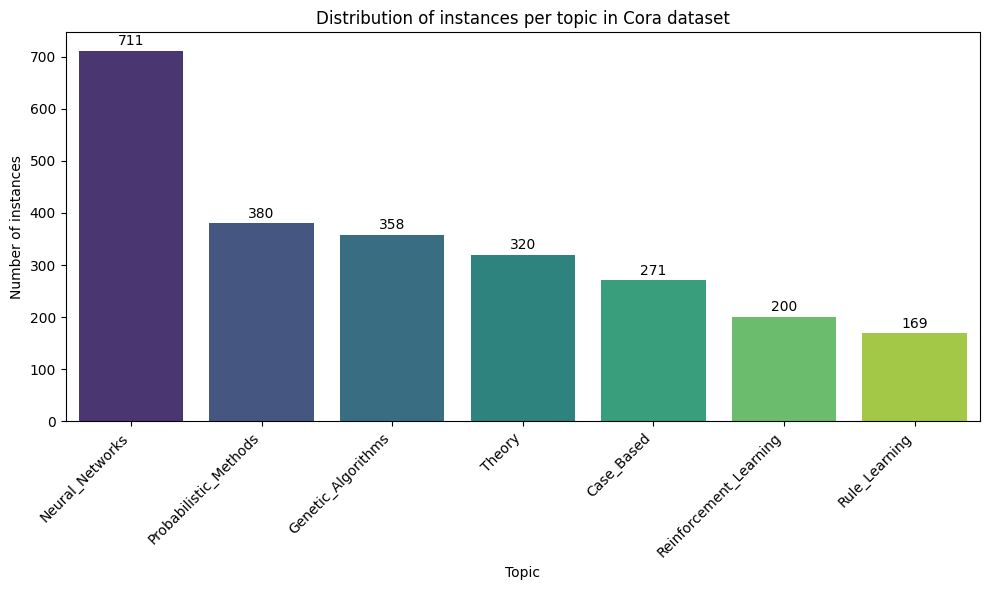

In [3]:
# Get counts for each class and plot distribution
topic_counts = dataset['topic2'].value_counts()

plt.figure(figsize=(10,6))
bars = sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Topic")
plt.ylabel("Number of instances")
plt.title("Distribution of instances per topic in Cora dataset")

# Add frequency numbers on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, int(height), ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

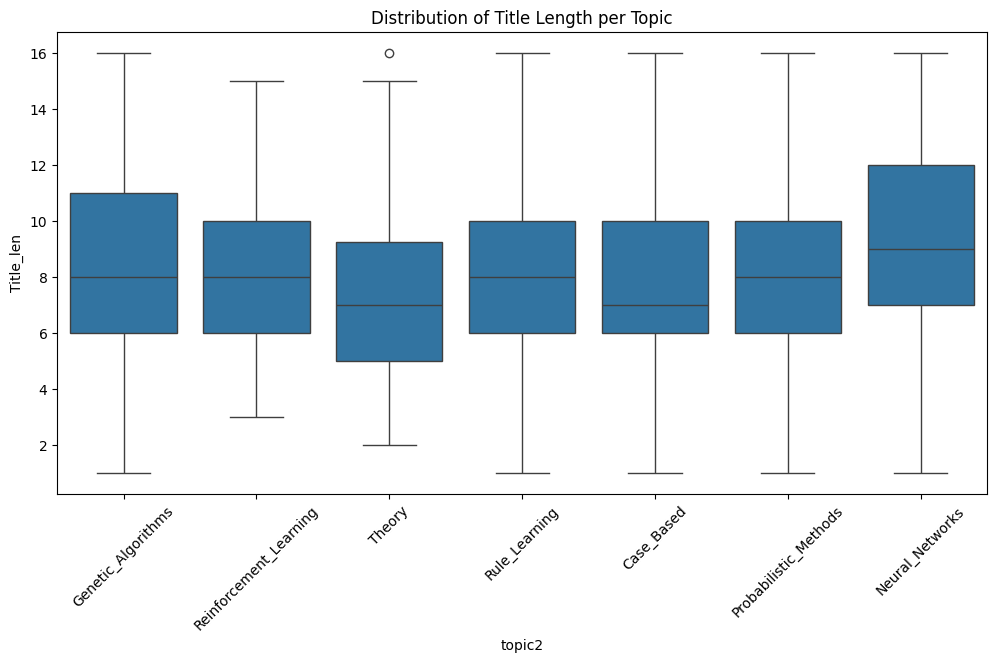

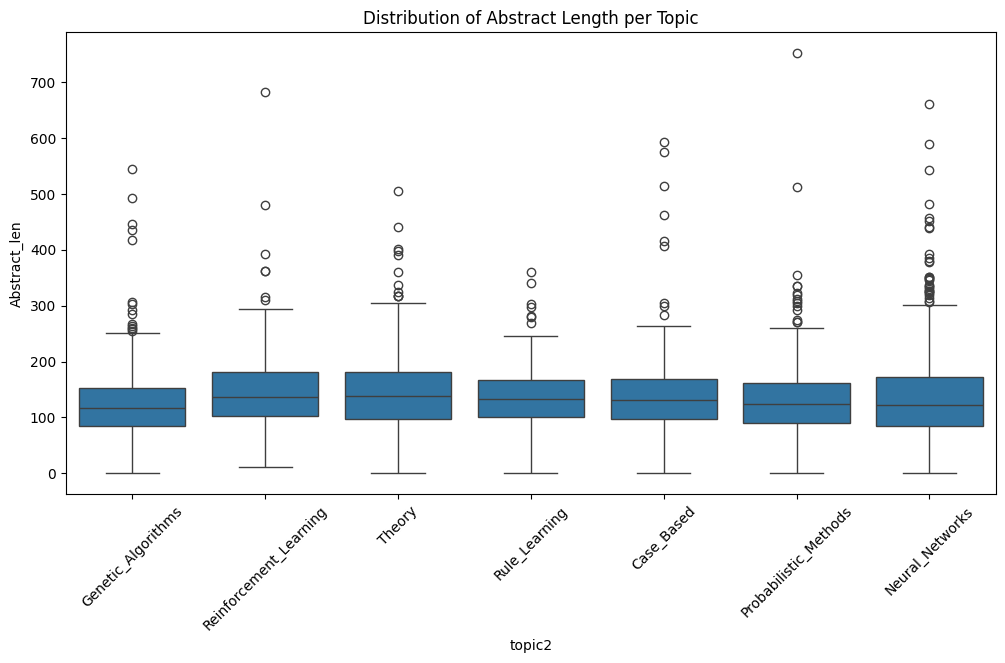

In [4]:
# Compute lengths
dataset['Title_len'] = dataset['Title'].fillna("").str.split().apply(len)
dataset['Abstract_len'] = dataset['Abstract'].fillna("").str.split().apply(len)

# Boxplot for Title length per topic
plt.figure(figsize=(12,6))
sns.boxplot(x='topic2', y='Title_len', data=dataset)
plt.xticks(rotation=45)
plt.title('Distribution of Title Length per Topic')
plt.show()

# Boxplot for Abstract length per topic
plt.figure(figsize=(12,6))
sns.boxplot(x='topic2', y='Abstract_len', data=dataset)
plt.xticks(rotation=45)
plt.title('Distribution of Abstract Length per Topic')
plt.show()


Total variance explained by 3 components: 0.011674556738286022


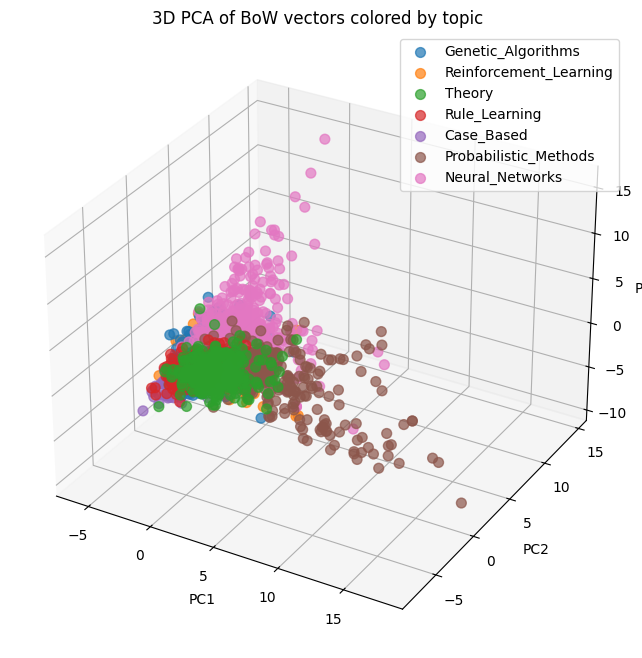

In [5]:


# Convert BoW to list
dataset['BoW'] = dataset['BoW'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
X = np.array(dataset['BoW'].tolist())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 3 components ---
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Variance explained by the 3 components
explained_var = pca.explained_variance_ratio_
print("Total variance explained by 3 components:", explained_var.sum())

# Plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

topics = dataset['topic2'].unique()
colors = sns.color_palette("tab10", len(topics))
topic_color = {topic: colors[i] for i, topic in enumerate(topics)}

# Plot each topic separately
for topic in topics:
    mask = dataset['topic2'] == topic
    ax.scatter(
        X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2],
        label=topic, alpha=0.7, color=topic_color[topic], s=50
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA of BoW vectors colored by topic')
ax.legend()
plt.show()
